In [13]:
# This program is a guided machine learning project that uses an artificial
# recurrent neural network called Long Short Term Memory (LSTM) to predict
# the closing stock price of a corporation (SM Investments Corporation (SM)) using the past 60 day stock price.
# Reference: https://www.youtube.com/watch?v=QIUxPv5PJOY


In [29]:
# Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf

In [34]:
# Get the stock quote
# df = data frame
df = yf.download('SM.PS', start='2012-01-01', end='2016-11-09')
df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,463.200012,463.200012,459.200012,462.399994,462.399994,78038
2012-01-04,464.000000,470.399994,464.000000,465.600006,465.600006,180125
2012-01-05,465.600006,467.200012,456.399994,456.399994,456.399994,267675
2012-01-06,456.399994,456.399994,445.600006,447.200012,447.200012,265988
2012-01-09,445.600006,463.200012,445.600006,463.200012,463.200012,158588
...,...,...,...,...,...,...
2016-11-02,681.000000,681.000000,669.000000,671.000000,671.000000,323150
2016-11-03,671.000000,679.500000,661.000000,664.000000,664.000000,689720
2016-11-04,661.000000,669.500000,661.000000,668.000000,668.000000,284500


In [35]:
# Get number of rows & cols
df.shape

(686, 6)

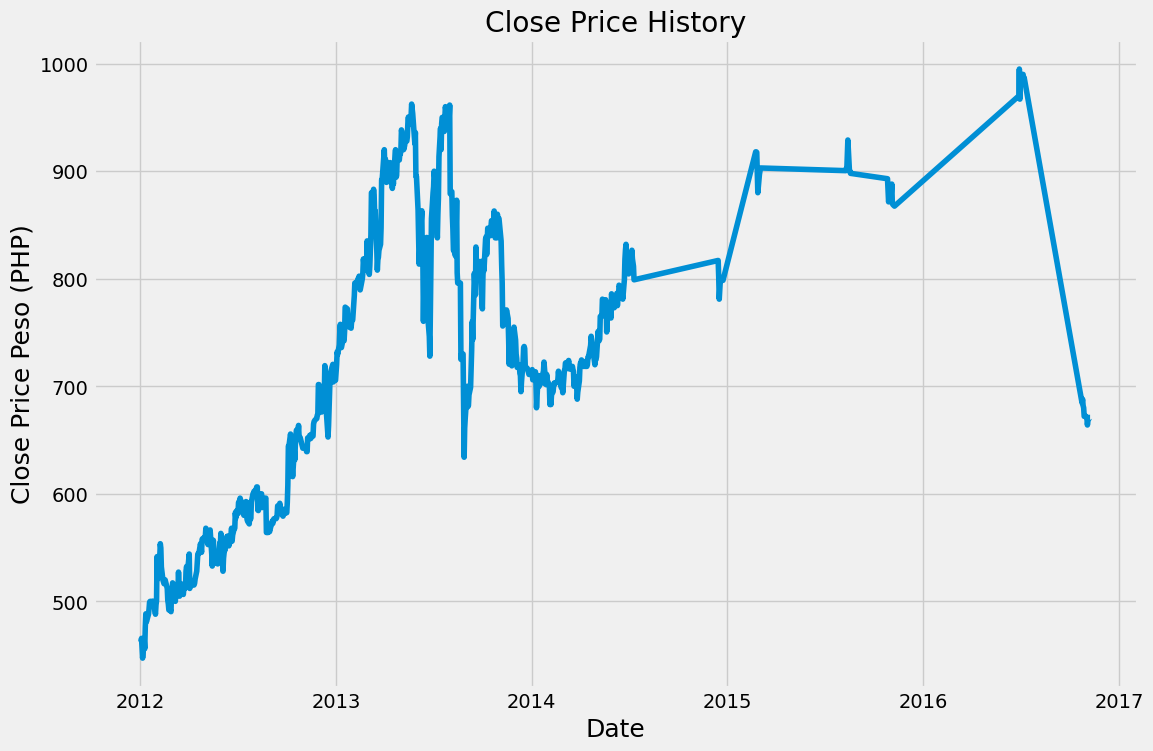

In [37]:
# Visualize the closing price history
plt.figure(figsize=(12, 8))
plt.title("Close Price History")
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Peso (PHP)', fontsize=18)
plt.show()

In [40]:
# Create a new data frame with only the Close column
data = df.filter(['Close'])
dataset = data.values #Converts the dataframe to a numpy array
# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

549

In [41]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.02774732],
       [0.03358889],
       [0.01679442],
       [0.        ],
       [0.02920774],
       [0.01606424],
       [0.05257391],
       [0.0752099 ],
       [0.06133621],
       [0.07447972],
       [0.08324202],
       [0.09492516],
       [0.09638552],
       [0.09638552],
       [0.09638552],
       [0.08908359],
       [0.09638552],
       [0.09200437],
       [0.07447972],
       [0.09054395],
       [0.0971157 ],
       [0.1723256 ],
       [0.13435556],
       [0.14019713],
       [0.17086524],
       [0.19423141],
       [0.18692947],
       [0.154801  ],
       [0.13216496],
       [0.12924423],
       [0.1263235 ],
       [0.12705363],
       [0.1328952 ],
       [0.11829133],
       [0.09784589],
       [0.09200437],
       [0.08178165],
       [0.08105147],
       [0.07886087],
       [0.11464036],
       [0.11391018],
       [0.12778387],
       [0.12267253],
       [0.11829133],
       [0.09638552],
       [0.11098939],
       [0.11829133],
       [0.118

In [45]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]

# Split the data into x_train and y_train datasets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
      print(x_train)
      print(y_train)
      print()

[array([0.02774732, 0.03358889, 0.01679442, 0.        , 0.02920774,
       0.01606424, 0.05257391, 0.0752099 , 0.06133621, 0.07447972,
       0.08324202, 0.09492516, 0.09638552, 0.09638552, 0.09638552,
       0.08908359, 0.09638552, 0.09200437, 0.07447972, 0.09054395,
       0.0971157 , 0.1723256 , 0.13435556, 0.14019713, 0.17086524,
       0.19423141, 0.18692947, 0.154801  , 0.13216496, 0.12924423,
       0.1263235 , 0.12705363, 0.1328952 , 0.11829133, 0.09784589,
       0.09200437, 0.08178165, 0.08105147, 0.07886087, 0.11464036,
       0.11391018, 0.12778387, 0.12267253, 0.11829133, 0.09638552,
       0.11098939, 0.11829133, 0.11829133, 0.1460387 , 0.12559326,
       0.10514782, 0.11098939, 0.11391018, 0.12559326, 0.11098939,
       0.10806861, 0.11829133, 0.11902157, 0.14749907, 0.15553124])]
[0.15188027393398784]

[array([0.02774732, 0.03358889, 0.01679442, 0.        , 0.02920774,
       0.01606424, 0.05257391, 0.0752099 , 0.06133621, 0.07447972,
       0.08324202, 0.09492516, 0.09

In [46]:
# Convert the x_train and y_train into numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(489, 60, 1)

In [47]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [48]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [49]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

489/489 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - loss: 0.0170


In [50]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [51]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [52]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test.shape

(137, 60, 1)

In [53]:
# Get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step


In [55]:
# Get the root mean squared error / (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

10.04660101006501

<ipython-input-58-80686ad0fc2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


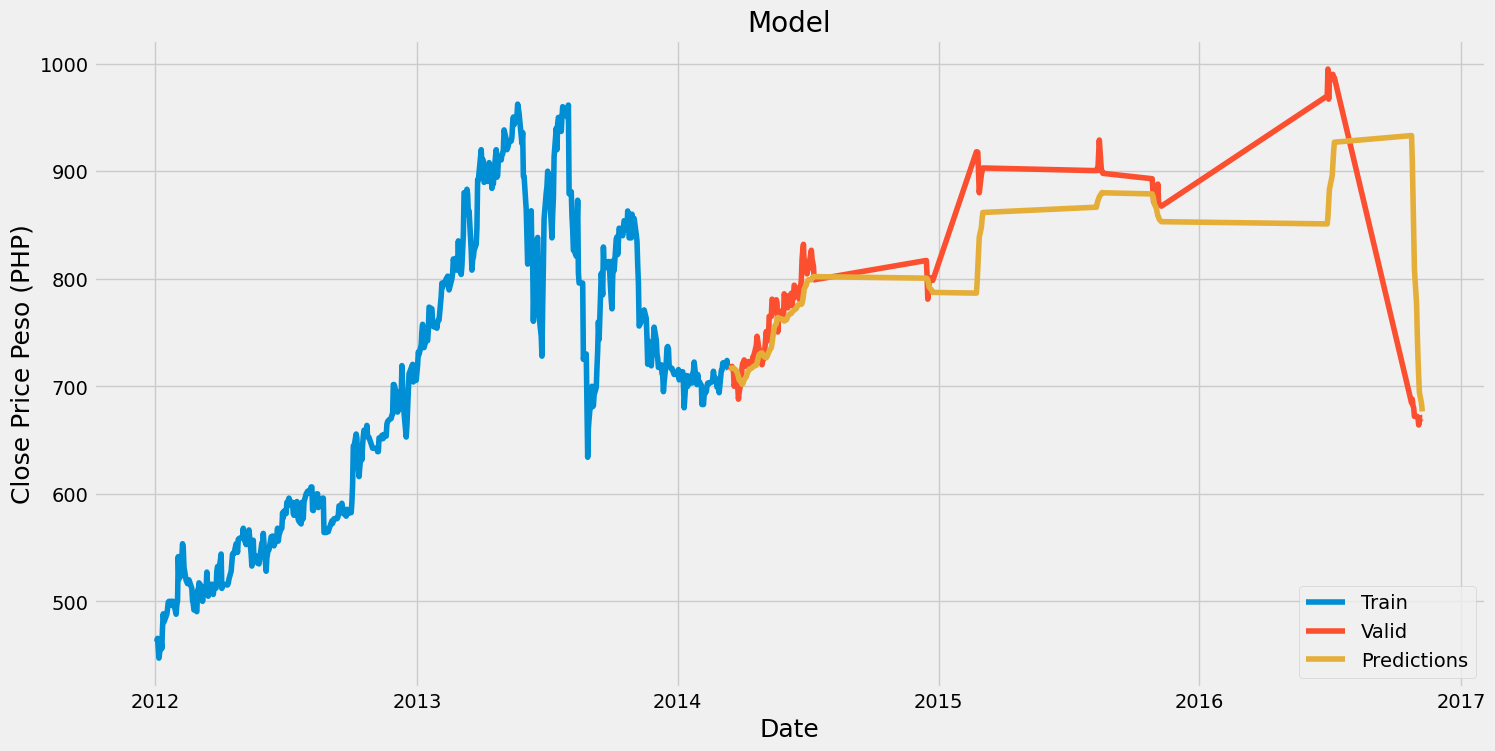

In [58]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price Peso (PHP)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc='lower right')
plt.show()

In [59]:
#Show the valid price
valid

,Close,Predictions
Date,,
2014-03-14,718.5,716.510010
2014-03-17,717.0,716.892517
2014-03-18,718.5,716.999695
2014-03-19,715.5,717.065308
2014-03-20,714.0,716.844360
...,...,...
2016-11-02,671.0,726.739929
2016-11-03,664.0,708.675232
2016-11-04,668.0,694.331543


In [61]:
# Get the quote
sm_quote = yf.download('SM.PS', start='2012-01-01', end='2016-11-09')
# Create a new dataframe
new_df = sm_quote.filter(['Close'])
# Get the last 60 days values and convert the dataframe to numpy array
last_60_days = new_df[-60:].values
# Scale the data
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test dataset to array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scale price
pred_price = model.predict(X_test)
#Undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) #Prediction Value

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[671.9126]]


In [62]:
# Get the quote
sm_quote2 = yf.download('SM.PS', start='2016-11-08', end='2016-11-09')
print(sm_quote2['Close']) #Real Price

[*********************100%***********************]  1 of 1 completed

Date
2016-11-08    671.0
Name: Close, dtype: float64
